In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so
import os
sns.set_palette("colorblind")
fontsize = 20

#### GLOBAL SUMMARY

In [10]:
global_summary = pd.read_parquet('global_summary.parquet')

In [11]:
global_summary['exp_time'] = (global_summary['filtered_acc_distributed_time'] - global_summary['timestamps.start_experiment']).dt.total_seconds()

In [12]:
global_summary

,result_folder,clients_J,clients_kWh,server_J,server_kWh,total_J,total_kWh,strategy,epoch,exp_id,...,comm.port,params.save_model,constraints,sparse_constraints.K,sparse_constraints.K_frac,sparse_constraints.mode,lp_constraints.ord,lp_constraints.mode,sparse_constraints.sparse_prop,exp_time
0,/Users/Slaton/Documents/grenoble-code/fl-flowe...,311692.776771,0.086581,28756.779114,0.007988,340449.555886,0.094569,fedavg,epoch_1,exp_0,...,8080,None,None,NaN,NaN,None,NaN,None,NaN,2787.964743
1,/Users/Slaton/Documents/grenoble-code/fl-flowe...,333395.483965,0.092610,30784.124494,0.008551,364179.608460,0.101161,fedavg,epoch_1,exp_1,...,8080,None,None,NaN,NaN,None,NaN,None,NaN,2975.368391
2,/Users/Slaton/Documents/grenoble-code/fl-flowe...,347882.633627,0.096634,32152.669133,0.008931,380035.302761,0.105565,fedavg,epoch_1,exp_2,...,8080,None,None,NaN,NaN,None,NaN,None,NaN,3109.964770
3,/Users/Slaton/Documents/grenoble-code/fl-flowe...,342005.231421,0.095001,119.382091,0.000033,342124.613512,0.095035,fedavg,epoch_1,exp_3,...,8080,None,None,NaN,NaN,None,NaN,None,NaN,3059.561777
4,/Users/Slaton/Documents/grenoble-code/fl-flowe...,350687.984128,0.097413,32391.376917,0.008998,383079.361045,0.106411,fedavg,epoch_1,exp_4,...,8080,True,None,NaN,NaN,None,NaN,None,NaN,3137.584944
5,/Users/Slaton/Documents/grenoble-code/fl-flowe...,305733.835164,0.084926,15643.307397,0.004345,321377.142561,0.089271,fedavg,epoch_5,exp_0,...,8080,True,None,NaN,NaN,None,NaN,None,NaN,1856.706389
6,/Users/Slaton/Documents/grenoble-code/fl-flowe...,315382.182164,0.087606,16123.612902,0.004479,331505.795066,0.092085,fedavg,epoch_5,exp_1,...,8080,True,None,NaN,NaN,None,NaN,None,NaN,1918.714678
7,/Users/Slaton/Documents/grenoble-code/fl-flowe...,278249.678329,0.077292,14242.039618,0.003956,292491.717947,0.081248,fedavg,epoch_5,exp_2,...,8080,True,None,NaN,NaN,None,NaN,None,NaN,1693.571026
8,/Users/Slaton/Documents/grenoble-code/fl-flowe...,316646.867352,0.087957,16142.924075,0.004484,332789.791427,0.092442,fedavg,epoch_5,exp_3,...,8080,True,None,NaN,NaN,None,NaN,None,NaN,1902.688798
9,/Users/Slaton/Documents/grenoble-code/fl-flowe...,317635.423565,0.088232,16105.221711,0.004474,333740.645275,0.092706,fedavg,epoch_5,exp_4,...,8080,True,None,NaN,NaN,None,NaN,None,NaN,1901.845748


In [13]:
cols_key = ['clients_J', 'clients_kWh', 'server_J', 'server_kWh',
       'total_J', 'total_kWh', 'strategy', 'epoch',
       'filtered_acc_centralized_round', 'filtered_acc_centralized_time',
       'filtered_acc_centralized', 'filtered_acc_distributed_round',
       'filtered_acc_distributed_time', 'filtered_acc_distributed',
       'max_centralized_accuracy', 'max_centralized_accuracy_round',
       'max_distributed_accuracy', 'max_distributed_accuracy_round','exp_time']
global_summary_gb = global_summary[cols_key].groupby(['strategy','epoch']).mean()
#global_summary_gb

In [14]:
# ratio of round time to accuracy between epoch 1 and epoch 5
global_summary_gb['filtered_acc_distributed_round'].xs('epoch_1',level='epoch')/global_summary_gb['filtered_acc_distributed_round'].xs('epoch_5',level='epoch')

strategy
fedadagrad        4.480198
fedadam           2.725664
fedavg            3.612121
fedavg_adam       3.557078
fedconstraints    4.783439
fedyogi           2.981395
Name: filtered_acc_distributed_round, dtype: float64

In [15]:
global_summary_gb['filtered_acc_distributed_round']

strategy        epoch  
fedadagrad      epoch_1    181.0
                epoch_5     40.4
fedadam         epoch_1    123.2
                epoch_5     45.2
fedavg          epoch_1    119.2
                epoch_5     33.0
fedavg_adam     epoch_1    155.8
                epoch_5     43.8
fedconstraints  epoch_1    150.2
                epoch_5     31.4
fedyogi         epoch_1    128.2
                epoch_5     43.0
Name: filtered_acc_distributed_round, dtype: float64

In [16]:
# ratio of time between epoch 1 and epoch 5
ratio_time = global_summary_gb['exp_time'].xs('epoch_1', level='epoch')/global_summary_gb['exp_time'].xs('epoch_5', level='epoch')
ratio_time

strategy
fedadagrad        2.009203
fedadam           1.235350
fedavg            1.625104
fedavg_adam       1.561000
fedconstraints    2.012122
fedyogi           1.359566
Name: exp_time, dtype: float64

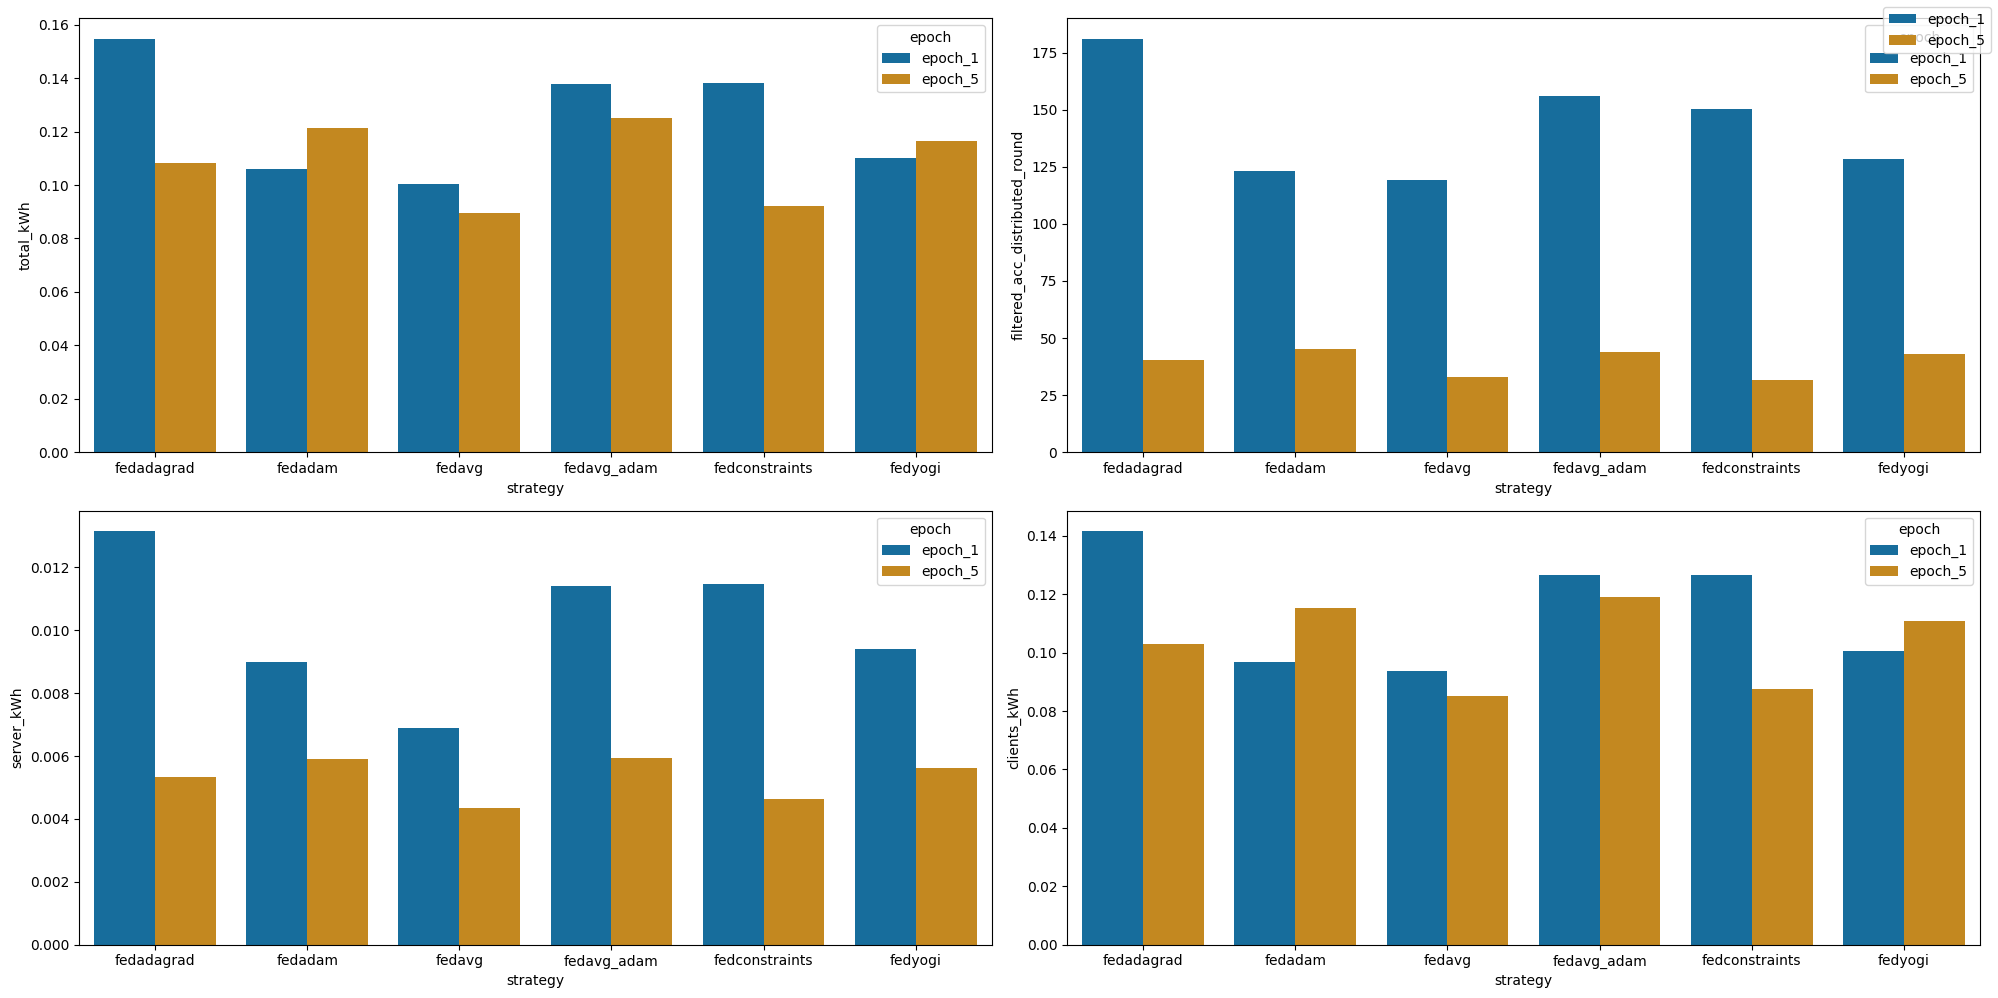

In [17]:
fig,axs = plt.subplots(2,2,figsize=(20,10))
data = global_summary_gb.reset_index()
sns.barplot(data=data, x='strategy', y='total_kWh',hue='epoch',ax=axs[0,0])
#sns.barplot(data=data, x='strategy', y='total_J',hue='epoch',ax=axs[0,1])
sns.barplot(data=data, x='strategy', y='filtered_acc_distributed_round',hue='epoch',ax=axs[0,1])
sns.barplot(data=data, x='strategy', y='server_kWh',hue='epoch',ax=axs[1,0])
sns.barplot(data=data, x='strategy', y='clients_kWh',hue='epoch',ax=axs[1,1])
# Create a common legend for all subplots
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()
plt.show()

In [18]:
strategy_summary=global_summary_gb.groupby(['strategy','epoch']).transform(lambda x : x)[['clients_kWh','server_kWh','total_kWh','exp_time']]
strategy_summary['server_Wh']=strategy_summary['server_kWh']*1e3
strategy_summary['client_Wh']=strategy_summary['clients_kWh']*1e3
strategy_summary['exp_time'] = strategy_summary['exp_time']/60
strategy_summary['total_Wh']=strategy_summary['total_kWh']*1e3
strategy_summary[['server_Wh','client_Wh','total_Wh','exp_time']]
print(strategy_summary[['server_Wh','client_Wh','total_Wh','exp_time']].to_latex(
    float_format="{:0.2f}".format,
))

\begin{tabular}{llrrrr}
\toprule
 &  & server_Wh & client_Wh & total_Wh & exp_time \\
strategy & epoch &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{fedadagrad} & epoch_1 & 13.15 & 141.56 & 154.71 & 76.87 \\
 & epoch_5 & 5.34 & 102.94 & 108.27 & 38.26 \\
\cline{1-6}
\multirow[t]{2}{*}{fedadam} & epoch_1 & 9.00 & 96.95 & 105.96 & 52.27 \\
 & epoch_5 & 5.91 & 115.44 & 121.35 & 42.31 \\
\cline{1-6}
\multirow[t]{2}{*}{fedavg} & epoch_1 & 6.90 & 93.65 & 100.55 & 50.23 \\
 & epoch_5 & 4.35 & 85.20 & 89.55 & 30.91 \\
\cline{1-6}
\multirow[t]{2}{*}{fedavg_adam} & epoch_1 & 11.42 & 126.52 & 137.94 & 66.53 \\
 & epoch_5 & 5.93 & 119.15 & 125.08 & 42.62 \\
\cline{1-6}
\multirow[t]{2}{*}{fedconstraints} & epoch_1 & 11.46 & 126.59 & 138.06 & 68.29 \\
 & epoch_5 & 4.64 & 87.63 & 92.26 & 33.94 \\
\cline{1-6}
\multirow[t]{2}{*}{fedyogi} & epoch_1 & 9.41 & 100.62 & 110.04 & 54.81 \\
 & epoch_5 & 5.62 & 110.80 & 116.42 & 40.32 \\
\cline{1-6}
\bottomrule
\end{tabular}



### 3.HOST SUMMARY

In [243]:
host_summary = pd.read_parquet('hosts_summary.parquet')
host_summary

,energy_J,energy_kwh,gpu_J,gpu_kwh,cpu_J,cpu_kwh,gpu_perc_avg,cpu_perc_avg,ram_perc_avg,hostname,role,result_folder,estatsname,strategy,epoch,exp_id
0,28756.779114,0.007988,4625.714752,0.001285,5921.674176,0.001645,8.805917,11.241360,0.206595,server,server,/Users/Slaton/Documents/grenoble-code/fl-flowe...,10,fedavg,epoch_1,exp_0
1,32687.088339,0.009080,8885.213350,0.002468,4752.612984,0.001320,17.705816,7.657578,0.109397,host_0,client,/Users/Slaton/Documents/grenoble-code/fl-flowe...,11,fedavg,epoch_1,exp_0
2,32828.317077,0.009119,9161.081527,0.002545,4664.046203,0.001296,19.245562,6.984015,0.109368,host_1,client,/Users/Slaton/Documents/grenoble-code/fl-flowe...,12,fedavg,epoch_1,exp_0
3,27263.087883,0.007573,5711.203701,0.001586,3776.707116,0.001049,12.824302,5.965640,0.109397,host_2,client,/Users/Slaton/Documents/grenoble-code/fl-flowe...,2,fedavg,epoch_1,exp_0
4,32482.768542,0.009023,9226.637793,0.002563,4435.979946,0.001232,19.325160,6.902088,0.109383,host_3,client,/Users/Slaton/Documents/grenoble-code/fl-flowe...,3,fedavg,epoch_1,exp_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,39948.460761,0.011097,14071.628922,0.003909,4547.664967,0.001263,27.368424,7.790872,0.109314,host_5,client,/Users/Slaton/Documents/grenoble-code/fl-flowe...,5,fedavg_adam,epoch_5,exp_4
656,48326.587936,0.013424,19281.887310,0.005356,5908.311369,0.001641,35.230703,8.672802,0.108862,host_6,client,/Users/Slaton/Documents/grenoble-code/fl-flowe...,6,fedavg_adam,epoch_5,exp_4
657,46681.257294,0.012967,17127.287695,0.004758,5905.052956,0.001640,28.114552,7.928134,0.108893,host_7,client,/Users/Slaton/Documents/grenoble-code/fl-flowe...,7,fedavg_adam,epoch_5,exp_4
658,55150.107306,0.015319,23965.993774,0.006657,6884.621215,0.001912,41.354107,9.924052,0.108859,host_8,client,/Users/Slaton/Documents/grenoble-code/fl-flowe...,8,fedavg_adam,epoch_5,exp_4


In [206]:
host_summary.columns
cols_host_key = ['energy_J', 'energy_kwh', 'gpu_J', 'gpu_kwh', 'cpu_J', 'cpu_kwh',
       'gpu_perc_avg', 'cpu_perc_avg', 'ram_perc_avg','role','hostname',
       'estatsname', 'strategy', 'epoch', 'exp_id']
host_summary_gb = host_summary[cols_host_key].groupby(['strategy','epoch','exp_id','hostname','estatsname','role']).mean()

In [212]:
host_summary_gb

energy_J  \
strategy   epoch   exp_id hostname estatsname role                   
fedadagrad epoch_1 exp_0  host_0   11         client  53582.852678   
                          host_1   12         client  54126.248198   
                          host_2   2          client  44524.561071   
                          host_3   3          client  53434.132573   
                          host_4   4          client  53559.316181   
...                                                            ...   
fedyogi    epoch_5 exp_4  host_6   6          client  36783.188072   
                          host_7   7          client  33981.089642   
                          host_8   8          client  48678.077375   
                          host_9   9          client  40694.961525   
                          server   10         server  19652.254872   

                                                      energy_kwh  \
strategy   epoch   exp_id hostname estatsname role                 
fedadagrad epoch_1 exp_0  host_0   11         client    0.014884   
                          host_1   12         client    0.015035   
                          host_2   2          client    0.012368   
                          host_3   3          client    0.014843   
                          host_4   4          client    0.014878   
...                                                          ...   
fedyogi    epoch_5 exp_4  host_6   6          client    0.010218   
                          host_7   7          client    0.009439   
                          host_8   8          client    0.013522   
                          host_9   9          client    0.011304   
                          server   10         server    0.005459   

                                                             gpu_J   gpu_kwh  \
strategy   epoch   exp_id hostname estatsname role                             
fedadagrad epoch_1 exp_0  host_0   11         client  14372.597263  0.003992   
                          host_1   12         client  14833.427815  0.004120   
                          host_2   2          client   9090.395414  0.002525   
                          host_3   3          client  15043.995833  0.004179   
                          host_4   4          client  15166.081485  0.004213   
...                                                            ...       ...   
fedyogi    epoch_5 exp_4  host_6   6          client  14714.368791  0.004087   
                          host_7   7          client  12367.414842  0.003435   
                          host_8   8          client  21596.422109  0.005999   
                          host_9   9          client  17068.811493  0.004741   
                          server   10         server   1778.394698  0.000494   

                                                            cpu_J   cpu_kwh  \
strategy   epoch   exp_id hostname estatsname role                            
fedadagrad epoch_1 exp_0  host_0   11         client  7470.361778  0.002075   
                          host_1   12         client  7634.117806  0.002121   
                          host_2   2          client  6182.747193  0.001717   
                          host_3   3          client  7241.491568  0.002012   
                          host_4   4          client  7169.598519  0.001992   
...                                                           ...       ...   
fedyogi    epoch_5 exp_4  host_6   6          client  3958.546844  0.001100   
                          host_7   7          client  4410.757020  0.001225   
                          host_8   8          client  5686.455058  0.001580   
                          host_9   9          client  5312.442004  0.001476   
                          server   10         server  3789.093582  0.001053   

                                                      gpu_perc_avg  \
strategy   epoch   exp_id hostname estatsname role                   
fedadagrad epoch_1 exp_0  host_0   11         client 

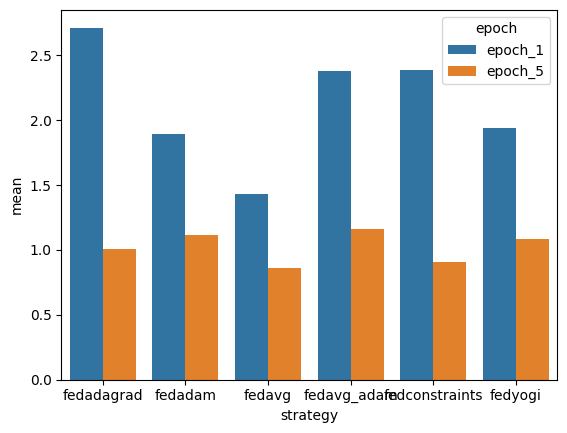

In [237]:
server_summary_gpu = host_summary_gb.xs('server',level='role').groupby(['strategy','epoch']).agg(['mean','std','count'])['cpu_kwh']
server_summary_gpu['mean'] = server_summary_gpu['mean']*1e3
server_summary_gpu['std'] = server_summary_gpu['std']*1e3
server_summary_gpu = server_summary_gpu.reset_index()
barplot = sns.barplot(data=server_summary_gpu, x='strategy', y='mean', hue='epoch')

In [208]:
global_summary_gb['server_kWh']*1e3

strategy        epoch  
fedadagrad      epoch_1    13.148179
                epoch_5     5.335149
fedadam         epoch_1     9.004742
                epoch_5     5.908312
fedavg          epoch_1     6.900241
                epoch_5     4.347617
fedavg_adam     epoch_1    11.415929
                epoch_5     5.929340
fedconstraints  epoch_1    11.461897
                epoch_5     4.635046
fedyogi         epoch_1     9.413731
                epoch_5     5.618759
Name: server_kWh, dtype: float64